In [2]:
import open3d as o3d
import numpy as np
import os
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
source = Path("subject_ego", "h1","0", "cam4")

In [76]:
K = np.array([[687.66020, 0.00000, 442.83470, 0.00000],
[0.00000, 688.90300, 238.93980, 0.00000],
[0.00000, 0.00000, 1.00000, 0.00000],
[0.00000, 0.00000, 0.00000, 0.00000]])

In [91]:
K

array([[687.6602,   0.    , 442.8347,   0.    ],
       [  0.    , 688.903 , 238.9398,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ]])

In [135]:
img = mpimg.imread(str(Path("PointCloud", "image_10.jpg")))

In [133]:
o3d.visualization.draw_geometries([pcd])

In [132]:
len(pcd.points)

1966

In [136]:
np.asarray(pcd.colors)[12] = np.array([1,0.,0.])
np.asarray(pcd.colors)[100] = np.array([0,1.,0.])
np.asarray(pcd.colors)[1000] = np.array([0,0.,1.])

In [137]:
homogeneous = np.ones((4, 3))
homogeneous[:3,0] = np.asarray(pcd.points)[12]
homogeneous[:3,1] = np.asarray(pcd.points)[100]
homogeneous[:3,2] = np.asarray(pcd.points)[1000]

In [138]:
homogeneous

array([[ 0.09359615,  0.07687811, -0.01278975],
       [ 0.04001773,  0.02670398, -0.00745294],
       [ 0.3674451 ,  0.3922798 ,  0.3444152 ],
       [ 1.        ,  1.        ,  1.        ]])

In [139]:
flip = True

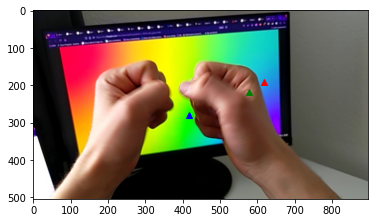

In [140]:
projected = K @ homogeneous
projected /= projected[2] # make homogeneous
                          # flip horizontally
imgplot = plt.imshow(img)
if flip:
    projected[1,:] *= -1
    projected[1,:] += height

plt.plot(projected[0,0], projected[1,0], "r^")
plt.plot(projected[0,1], projected[1,1], "g^")
plt.plot(projected[0,2], projected[1,2], "b^")



In [130]:
img[projected.astype(int)[:2,:2].T]

IndexError: index 738 is out of bounds for axis 0 with size 504

In [107]:
np.shape(np.asarray(pcd.colors))

(1098, 3)

In [70]:
def color_points(pcd, image):
    homogeneous = np.ones((4, len(pcd.points)))
    homogeneous[:3,:] = np.asarray(pcd.points)
    projected = K @ homogeneous
    
    projected /= projected[2] # make homogeneous
    
    # flip horizontally
    if flip:
        projected[1,:] *= -1
        projected[1,:] += height
        
    projected = projected.astype(int)
    
        
    np.asarray(pcd.colors)


(504, 896, 3)